# 数据可视化和摘要


#### 导入相关工具包

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

#### 分析youtobe数据，展示前5行



In [27]:
f = open('youtube-new/CAvideos.csv')
df = pd.read_csv(f)
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


## 数据摘要

#### 不同列各个取值的频数

In [29]:
cols = ['views', 'likes', 'dislikes','comment_count']
for col in cols:
    print(df[col].value_counts())
    print('-' * 50)

27604      3
124117     3
103431     3
180342     3
145805     3
183988     3
9616       3
165832     3
108967     3
53379      3
9924       3
224270     3
106965     3
61215      3
44417      3
608902     3
119277     3
23057      3
21900      3
256922     3
141897     3
61941      3
158013     3
154261     3
4953       3
207321     2
341356     2
275241     2
151388     2
140577     2
          ..
2484656    1
585348     1
308180     1
3979874    1
84572      1
883290     1
697201     1
70231      1
963302     1
1063506    1
852597     1
748152     1
795281     1
221817     1
776846     1
182924     1
337788     1
1432637    1
844425     1
228434     1
824259     1
35460      1
242307     1
2538114    1
489394     1
350846     1
1131133    1
4301571    1
29307      1
67585      1
Name: views, Length: 40170, dtype: int64
--------------------------------------------------
0         284
35         18
337        17
25         17
60         17
106        17
44         16
269        16
36 

#### 最大、最小、均值、中位数、四分位数



In [28]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000,40881.000,40881.000,40881.000,40881.000
mean,20.796,1147035.911,39582.688,2009.195,5042.975
std,6.775,3390913.022,132689.531,19008.370,21579.021
min,1.000,733.000,0.000,0.000,0.000
25%,20.000,143902.000,2191.000,99.000,417.000
50%,24.000,371204.000,8780.000,303.000,1301.000
75%,24.000,963302.000,28717.000,950.000,3713.000
max,43.000,137843120.000,5053338.000,1602383.000,1114800.000


#### 缺失值的个数



In [40]:
df.isnull()[['category_id', 'views','likes', 'dislikes','comment_count']].sum()

category_id      0
views            0
likes            0
dislikes         0
comment_count    0
dtype: int64

## 检验是否符合正态分布


 mu = 1147035.92 and sigma = 3390871.55



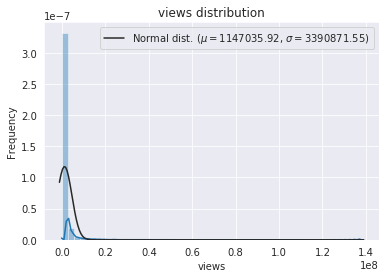

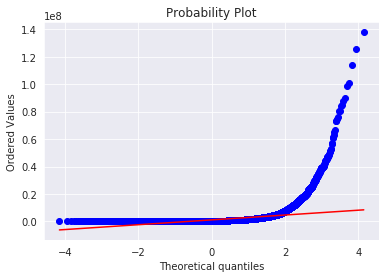

In [25]:
views = df['views'].apply(lambda x: x + np.random.normal())
sns.distplot(views, fit=norm);
mu, sigma = norm.fit(views)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('views distribution')

#Q-Q图
fig = plt.figure()
res = stats.probplot(views, plot=plt)
plt.show()

#### 通过观察柱状图、QQ图，views不服从正态分布




 mu = 39582.68 and sigma = 132687.91



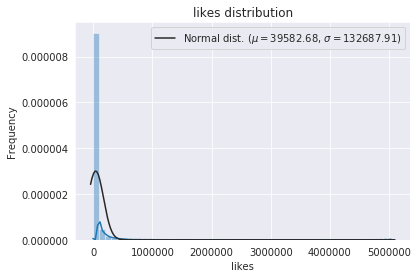

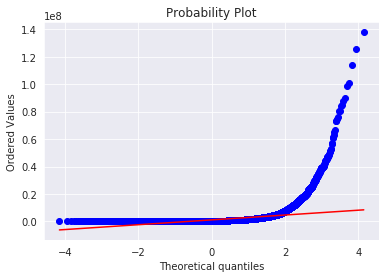

In [41]:
likes = df['likes'].apply(lambda x: x + np.random.normal())
sns.distplot(likes, fit=norm);
mu, sigma = norm.fit(likes)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('likes distribution')

#Q-Q图
fig = plt.figure()
res = stats.probplot(views, plot=plt)
plt.show()

#### 通过观察柱状图、QQ图，likes不服从正态分布


 mu = 2009.21 and sigma = 19008.13



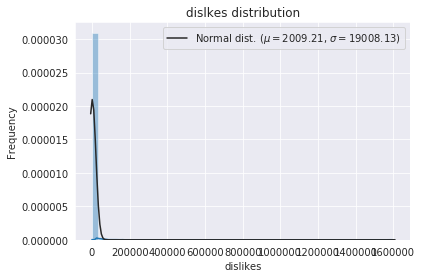

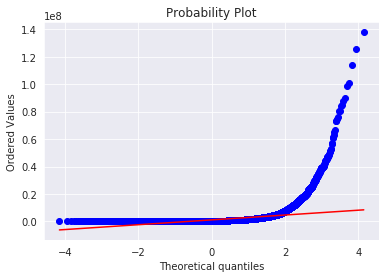

In [13]:
dislikes = df['dislikes'].apply(lambda x: x + np.random.normal())
sns.distplot(dislikes, fit=norm);
mu, sigma = norm.fit(dislikes)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('dislkes distribution')

#Q-Q图
fig = plt.figure()
res = stats.probplot(views, plot=plt)
plt.show()

#### 通过观察柱状图、QQ图，dislikes不服从正态分布


 mu = 5042.97 and sigma = 21578.75



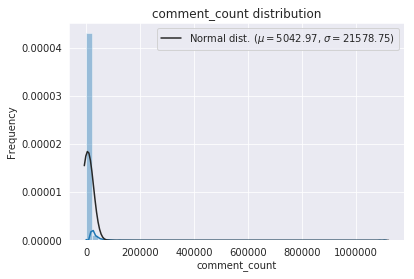

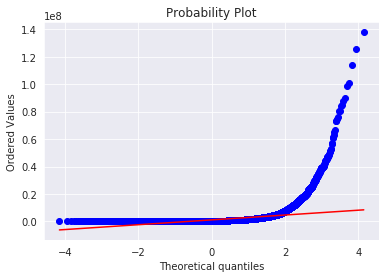

In [32]:
comment_count = df['comment_count'].apply(lambda x: x + np.random.normal())
sns.distplot(comment_count, fit=norm);
mu, sigma = norm.fit(comment_count)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('comment_count distribution')

#Q-Q图
fig = plt.figure()
res = stats.probplot(views, plot=plt)
plt.show()

#### 通过观察柱状图、QQ图，comment_count不服从正态分布

# 盒图绘制

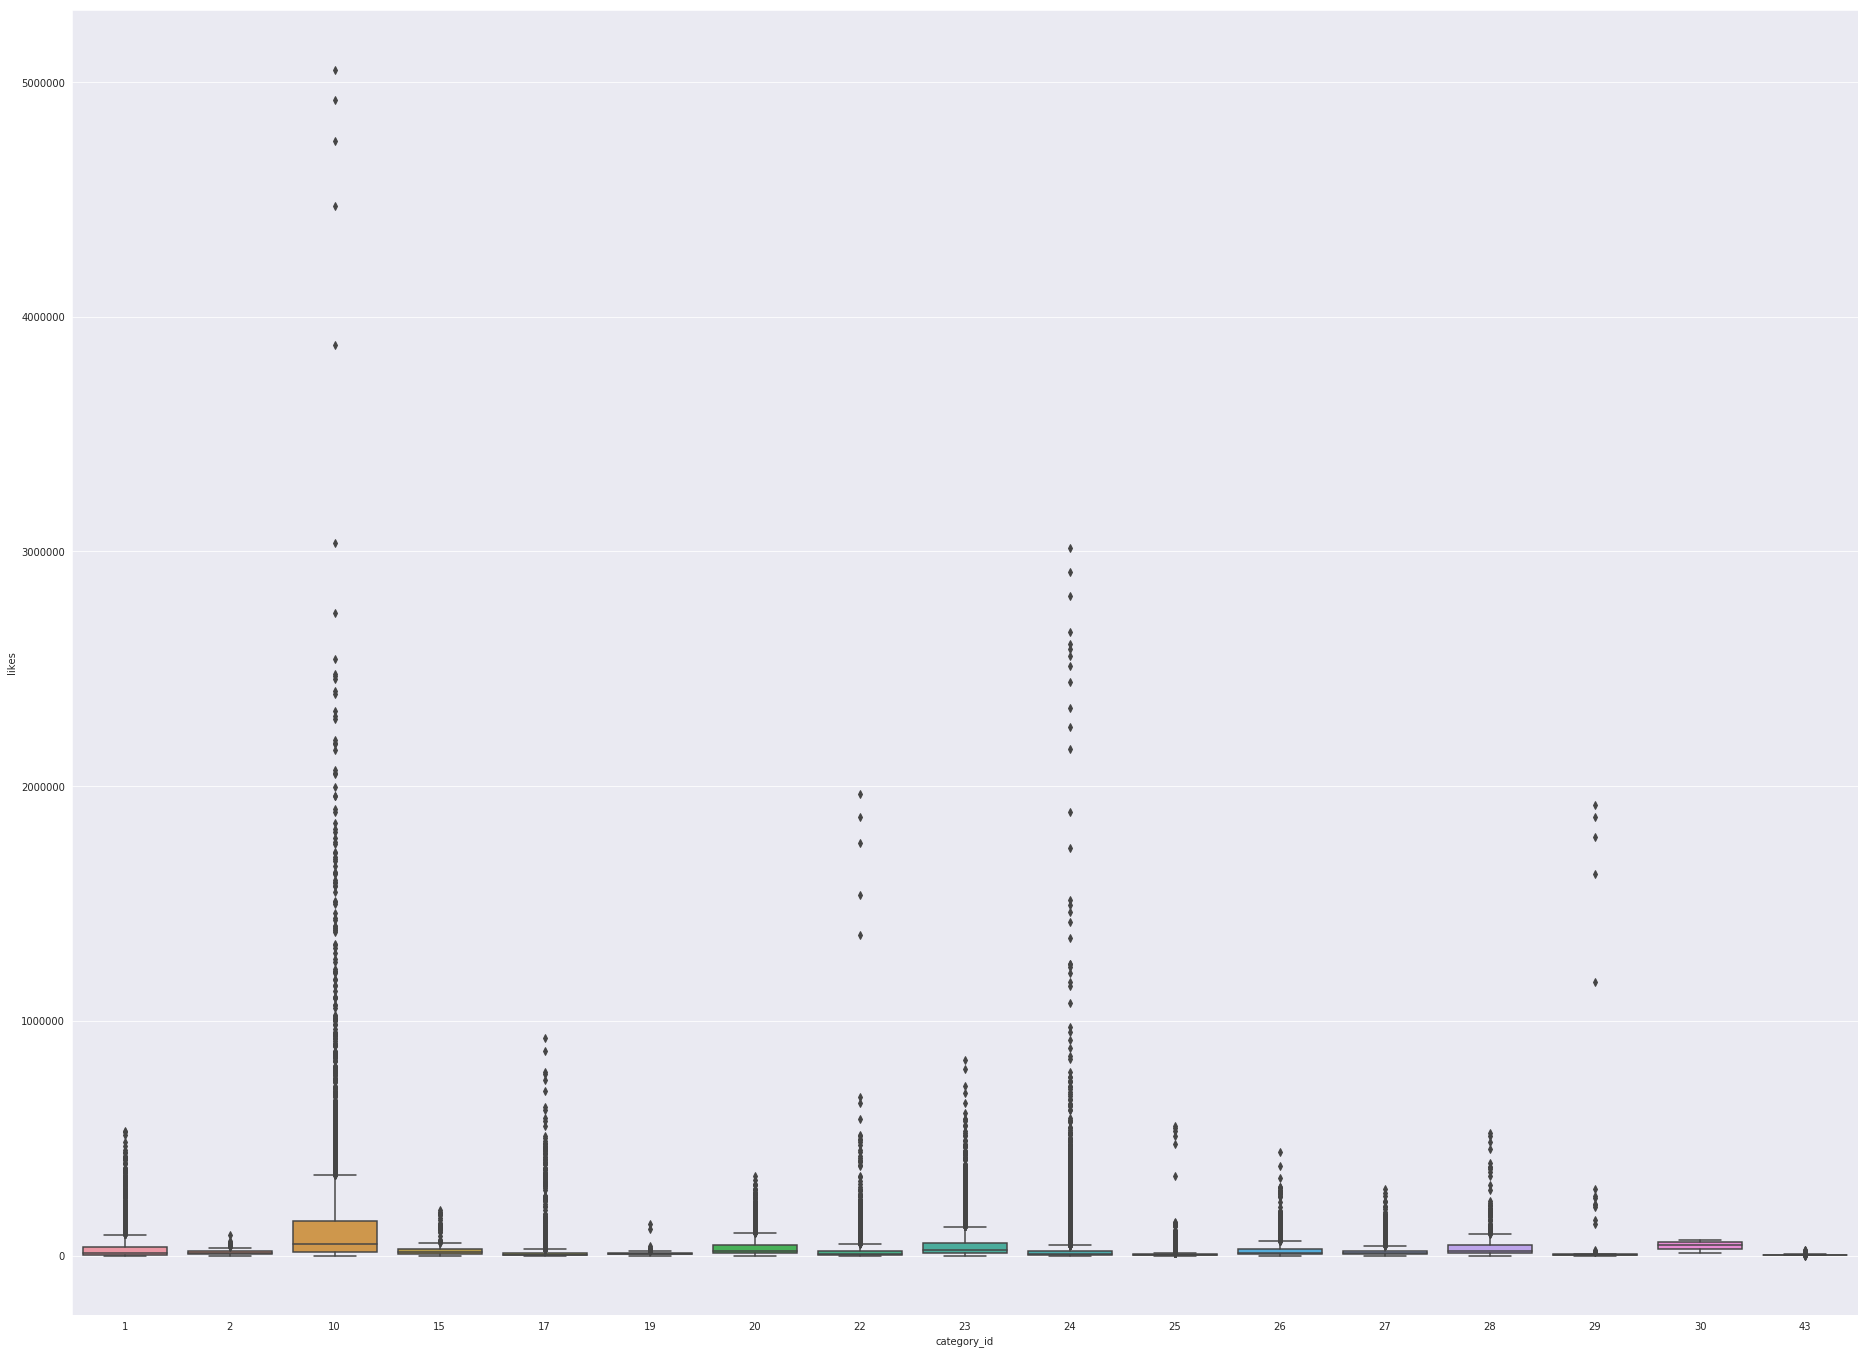

In [33]:
var = 'category_id'
data = pd.concat([df['likes'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(32, 24))
fig = sns.boxplot(x=var, y="likes", data=data)
# fig.axis(ymin=0, ymax=2300);

# 数据缺失的处理


## 缺失值分析

In [34]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

In [35]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio
description,3.170


Text(0.5,1,'Percent missing data of feature')

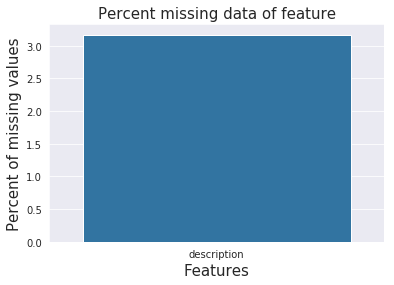

In [36]:
# fig = plt.figure(figsize=(2, 6))
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data of feature', fontsize=15)

#### description列对应的应该是文本，在分析之后，添加None最为合适



In [42]:
df['description'] = df['description'].fillna('None')

In [43]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [44]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data

,Missing Ratio


#### 数据集所有列的缺失值为0

